In [136]:
# Import the dependencies.
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key

In [137]:
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [138]:
# generate 1500 random latitude and longitude data as a list of tuples
lats = np.random.uniform(-90.0,90.0,size=1500)
lngs = np.random.uniform(-180.0,180.0,size=1500)
lats_lngs = zip(lats, lngs)
coordinates = list(lats_lngs)
print(coordinates[:11])

[(15.137033187377313, 162.3552924098462), (41.3454212142756, -53.66789139827314), (18.3155247396202, -34.4638406665961), (6.8045251019654245, 16.057958377036613), (51.76898045596286, -157.75860377963826), (20.843824201534744, -57.49659719398943), (-26.94736477892826, 141.19361249763494), (68.77631934834429, 174.98906840839732), (71.59618569647387, 49.23549493272935), (8.05472254718515, 133.9478531601859), (6.090522173580183, 37.64958522055929)]


In [139]:
# use citipy module to get nearest city names
cities = list()
for coor in coordinates:
    cities_name = citipy.nearest_city(coor[0], coor[1]).city_name
    # ensure no any duplicate cities
    if cities_name not in cities:
        cities.append(cities_name)
print(cities[:10], 'Generate', len(cities))

['butaritari', 'saint-pierre', 'ponta do sol', 'bocaranga', 'kodiak', 'codrington', 'broken hill', 'komsomolskiy', 'belushya guba', 'meyungs'] Generate 609


In [140]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [141]:
# use OpenWeather API to request, get, parse JSON to retrieve weather data for each city.

# initial counters for log and sets
record_count = 1 
set_count = 1

city_data = list()
basic_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

print('Beginning Data Retrieval     ')
print("-----------------------------")

# use enumerate() method to loop index and item simutanously 
for i, item in enumerate(cities):
    if i % 50 == 0 and i != 0 :
        record_count = 1  # initialize at every beginning of set
        set_count +=1 # increment set count
    # build URL for API call
    url = basic_url + '&q=' + item
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {item}')
    # increment record count
    record_count +=1

    try: 
        js = requests.get(url).json()
        city_name = item
        city_country = js['sys']['country']
        city_UTCdate = js['dt']
        city_date = datetime.utcfromtimestamp(city_UTCdate).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = js['coord']['lat']
        city_lon = js['coord']['lon']
        city_max_temp = js['main']['temp_max']
        city_humidity = js['main']['humidity']
        city_cload = js['clouds']['all']
        city_wind_speed = js['wind']['speed']
        # append as a list of dictionaries
        city_data.append({'City':city_name, 'Coounty':city_country, 'Date':city_date, 
                        'Lat':city_lat, 'Lng': city_lon,'Max Temp':city_max_temp,
                        'Humidity':city_humidity,'Cloudiness': city_cload,'Wind Speed':city_wind_speed})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

print(len(city_data))


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | saint-pierre
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | bocaranga
City not found. Skipping...
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | broken hill
Processing Record 8 of Set 1 | komsomolskiy
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | meyungs
City not found. Skipping...
Processing Record 11 of Set 1 | gidole
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | ust-karsk
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | margate
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of

Processing Record 39 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 4 | nurobod
Processing Record 41 of Set 4 | jishu
Processing Record 42 of Set 4 | altagracia de orituco
Processing Record 43 of Set 4 | newala
Processing Record 44 of Set 4 | mutoko
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | marcona
City not found. Skipping...
Processing Record 47 of Set 4 | itoman
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | vila
Processing Record 50 of Set 4 | two rivers
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | kurumkan
Processing Record 3 of Set 5 | venice
Processing Record 4 of Set 5 | yanan
City not found. Skipping...
Processing Record 5 of Set 5 | fairbanks
Processing Record 6 of Set 5 | parasia
Processing Record 7 of Set 5 | bayir
Processing Record 8 of Set 5 | fevralsk
City not found. Skipping...
Processing Record 9 of Set 5 | quba
Processing R

Processing Record 28 of Set 8 | erenhot
Processing Record 29 of Set 8 | jalu
Processing Record 30 of Set 8 | altona
Processing Record 31 of Set 8 | albino
Processing Record 32 of Set 8 | barybino
Processing Record 33 of Set 8 | gizo
Processing Record 34 of Set 8 | tsaratanana
Processing Record 35 of Set 8 | mattru
Processing Record 36 of Set 8 | saldanha
Processing Record 37 of Set 8 | sable-sur-sarthe
Processing Record 38 of Set 8 | bathurst
Processing Record 39 of Set 8 | kandalaksha
Processing Record 40 of Set 8 | guatire
Processing Record 41 of Set 8 | hailar
Processing Record 42 of Set 8 | eston
Processing Record 43 of Set 8 | clyde river
Processing Record 44 of Set 8 | hihifo
City not found. Skipping...
Processing Record 45 of Set 8 | thinadhoo
Processing Record 46 of Set 8 | adrar
Processing Record 47 of Set 8 | gualaquiza
Processing Record 48 of Set 8 | aquiraz
Processing Record 49 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 50 of Set 8 | white rock
P

Processing Record 15 of Set 12 | tocopilla
Processing Record 16 of Set 12 | kastamonu
Processing Record 17 of Set 12 | walvis bay
Processing Record 18 of Set 12 | hegang
Processing Record 19 of Set 12 | supuru de jos
Processing Record 20 of Set 12 | tumpat
Processing Record 21 of Set 12 | malwan
City not found. Skipping...
Processing Record 22 of Set 12 | college
Processing Record 23 of Set 12 | mecca
Processing Record 24 of Set 12 | tucuman
Processing Record 25 of Set 12 | san andres
Processing Record 26 of Set 12 | ola
Processing Record 27 of Set 12 | aksarka
Processing Record 28 of Set 12 | gwadar
Processing Record 29 of Set 12 | dharchula
Processing Record 30 of Set 12 | nizhneivkino
Processing Record 31 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 32 of Set 12 | the pas
Processing Record 33 of Set 12 | uige
Processing Record 34 of Set 12 | huarmey
Processing Record 35 of Set 12 | logansport
Processing Record 36 of Set 12 | kendallville
Processing Record 37 o

In [142]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Coounty,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,butaritari,KI,2020-12-02 23:59:50,3.07,172.79,81.43,78,38,14.14
1,saint-pierre,RE,2020-12-02 23:59:51,-21.34,55.48,75.20,69,0,4.70
2,ponta do sol,PT,2020-12-02 23:59:51,32.67,-17.10,66.20,82,40,10.29
3,kodiak,US,2020-12-02 23:59:52,57.79,-152.41,28.40,58,1,16.11
4,codrington,AU,2020-12-02 23:59:52,-38.27,141.97,60.13,52,17,4.68
5,broken hill,AU,2020-12-02 23:59:53,-31.95,141.43,71.60,21,99,9.17
6,komsomolskiy,UZ,2020-12-02 23:59:53,40.43,71.72,41.00,80,75,4.70
7,gidole,ET,2020-12-02 23:59:54,5.65,37.37,59.49,87,36,3.40
8,rikitea,PF,2020-12-02 23:59:54,-23.12,-134.97,76.51,66,27,2.26
9,castro,BR,2020-12-02 23:57:44,-24.79,-50.01,66.20,96,70,4.97


In [143]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

KeyError: "['Country'] not in index"

In [110]:
# convert the list of dictionaries into DataFrame, and export to .csv file

unmod_city_data_df = pd.DataFrame(city_data)
city_data_df = unmod_city_data_df.rename(columns={'Coounty': 'Country'})
city_data_df.head()
city_data_df.to_csv(path_or_buf='weather_data/cities.csv', index_label='City_ID')


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/cities.csv'

In [ ]:
# 4 scatter plots, showcase weather parameter changing by latitude
# extract relevant fields(columns) as Series
lats_Series = city_data_df['Lat']
max_temp_Series = city_data_df['Max Temp']
humidity_Series = city_data_df['Humidity']
cloud_Series = city_data_df['Cloudiness']
wind_speed_Series = city_data_df['Wind Speed']

#show today's datetime in fig label
today = time.strftime('%x')

In [ ]:
# build the 1st scatter plot for lat vs. Max Temp.
fig = plt.figure()
plt.scatter(lats_Series,max_temp_Series, 
            alpha=0.8, edgecolors='k', linewidths=1,marker='o', label='Cities' )
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('weather_data/Fig1.png')
plt.show()

In [111]:
# build the 2nd scatter plot for lat vs. Humidity.
fig = plt.figure()
plt.scatter(lats_Series,humidity_Series, 
            alpha=0.8, edgecolors='k', linewidths=1,marker='o', label='Cities' )
plt.title(f"City Latitude vs. Humidity " + today)
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('weather_data/Fig2.png')
#plt.legend()
plt.show()

NameError: name 'lats_Series' is not defined

<Figure size 432x288 with 0 Axes>

In [112]:
# build the 3rd scatter plot for lat vs. Cloudiness.
fig = plt.figure()
plt.scatter(lats_Series,cloud_Series, 
            alpha=0.8, edgecolors='k', linewidths=1,marker='o', label='Cities' )
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('weather_data/Fig3.png')
plt.show()

NameError: name 'lats_Series' is not defined

<Figure size 432x288 with 0 Axes>

In [113]:
# build the 4th scatter plot for lat vs. Wind Speed.
fig = plt.figure()
plt.scatter(lats_Series,wind_speed_Series, 
            alpha=0.8, edgecolors='k', linewidths=1,marker='o', label='Cities' )
plt.title(f"City Latitude vs. Wind Speed " + today)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('weather_data/Fig4.png')
plt.show()

NameError: name 'lats_Series' is not defined

<Figure size 432x288 with 0 Axes>

In [114]:
def plot_linear_function(x_values, y_values,title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    #step 2: Get the equation of the line. and R, P values
    line_eq_str = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correl_str = str(round(r_value,2))
    pvalue_str = str(p_value)
    #step 3: Calculate the regression line "y values" from the slope and intercept.
    regress_Y_values =[(x * slope + intercept) for x in x_values]
    #step 4:Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_Y_values, color = 'r')
    plt.annotate(line_eq_str,xy= text_coordinates, fontsize =15, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)

    #plt.show()
    print(f'R_value is {correl_str}, and P_value is {pvalue_str}')


In [115]:
# seperate northern and southern hemisphere latitude
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0),:]

southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0),:]

northern_hemi_df.count()
southern_hemi_df.count()

City          183
Country       183
Date          183
Lat           183
Lng           183
Max Temp      183
Humidity      183
Cloudiness    183
Wind Speed    183
dtype: int64

R_value is -0.88, and P_value is 3.0848153526632703e-125


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Regress_fig1.png'

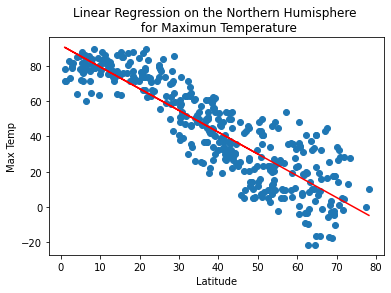

In [116]:
# build the Northern hemisphere regression line and scatter plot for lat vs. Max Temp.
N_max_temp_x_Series = northern_hemi_df['Lat']
N_max_temp_y_Series = northern_hemi_df['Max Temp']
# call function: plot_linear_function 
plot_linear_function(N_max_temp_x_Series, 
                N_max_temp_y_Series, 
                'Linear Regression on the Northern Humisphere \n for Maximun Temperature',
                'Max Temp', (10,-40))
plt.savefig('weather_data/Regress_fig1.png')
plt.show()

R_value is 0.61, and P_value is 5.817209962734027e-20


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Regress_fig2.png'

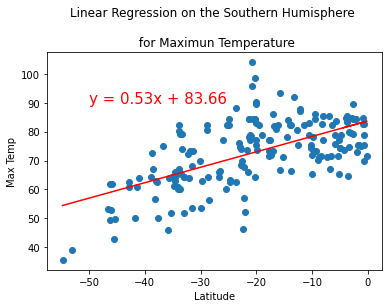

In [117]:
# build the Southern hemisphere regression line and scatter plot for lat vs. Max Temp.
S_max_temp_x_Series = southern_hemi_df['Lat']
S_max_temp_y_Series = southern_hemi_df['Max Temp']
# call function: plot_linear_function 
plot_linear_function(S_max_temp_x_Series, 
                S_max_temp_y_Series, 
                '''Linear Regression on the Southern Humisphere 
                \n for Maximun Temperature''',
                'Max Temp', (-50,90))
plt.savefig('weather_data/Regress_fig2.png')
plt.show()

R_value is 0.43, and P_value is 6.828035440306889e-19


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Regress_fig3.png'

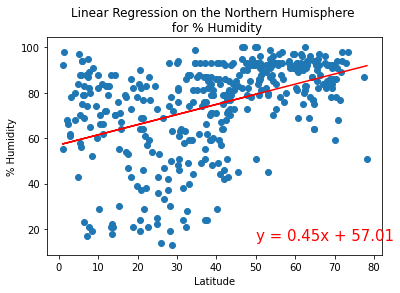

In [118]:
# build the Northern hemisphere regression line and scatter plot for lat vs. Humidity.
N_humidity_x_Series = northern_hemi_df['Lat']
N_humidity_y_Series = northern_hemi_df['Humidity']
# call function: plot_linear_function 
plot_linear_function(N_humidity_x_Series, 
                N_humidity_y_Series, 
                'Linear Regression on the Northern Humisphere \n for % Humidity',
                '% Humidity', (50,15))
plt.savefig('weather_data/Regress_fig3.png')
plt.show()

R_value is 0.32, and P_value is 9.694830275870843e-06


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Regress_fig4.png'

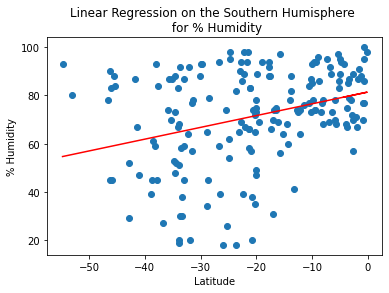

In [119]:
# build the Southern hemisphere regression line and scatter plot for lat vs. Humidity.
S_humidity_x_Series = southern_hemi_df['Lat']
S_humidity_y_Series = southern_hemi_df['Humidity']
# call function: plot_linear_function 
plot_linear_function(S_humidity_x_Series, 
                S_humidity_y_Series, 
                'Linear Regression on the Southern Humisphere \n for % Humidity',
                '% Humidity', (-55,10))
plt.savefig('weather_data/Regress_fig4.png')
plt.show()


R_value is 0.08, and P_value is 0.12035353562594159


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Regress_fig5.png'

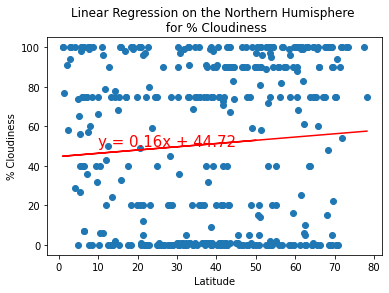

In [120]:
# build the Northern hemisphere regression line and scatter plot for lat vs. Cloudiness.
N_Cloudiness_x_Series = northern_hemi_df['Lat']
N_Cloudiness_y_Series = northern_hemi_df['Cloudiness']
# call function: plot_linear_function 
plot_linear_function(N_Cloudiness_x_Series, 
                N_Cloudiness_y_Series, 
                'Linear Regression on the Northern Humisphere \n for % Cloudiness',
                '% Cloudiness', (10,50))
plt.savefig('weather_data/Regress_fig5.png')
plt.show()


R_value is 0.26, and P_value is 0.00029952856077211735


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Regress_fig6.png'

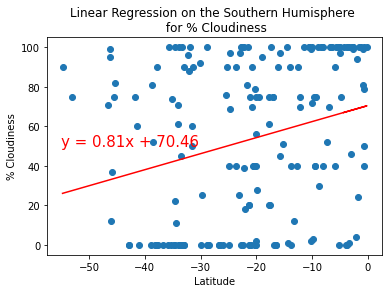

In [121]:
# build the Southern hemisphere regression line and scatter plot for lat vs. Cloudiness.
S_Cloudiness_x_Series = southern_hemi_df['Lat']
S_Cloudiness_y_Series = southern_hemi_df['Cloudiness']
# call function: plot_linear_function 
plot_linear_function(S_Cloudiness_x_Series, 
                S_Cloudiness_y_Series, 
                'Linear Regression on the Southern Humisphere \n for % Cloudiness',
                '% Cloudiness', (-55,50))
plt.savefig('weather_data/Regress_fig6.png')
plt.show()

R_value is 0.18, and P_value is 0.0004001349446869984


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Regress_fig7.png'

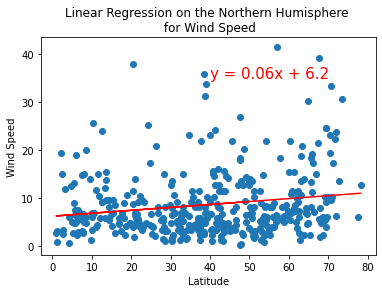

In [122]:
# build the Northern hemisphere regression line and scatter plot for lat vs. Wind Speed.
N_WindSpeed_x_Series = northern_hemi_df['Lat']
N_WindSpeed_y_Series = northern_hemi_df['Wind Speed']
# call function: plot_linear_function 
plot_linear_function(N_WindSpeed_x_Series, 
                N_WindSpeed_y_Series, 
                'Linear Regression on the Northern Humisphere \n for Wind Speed',
                'Wind Speed', (40,35))
plt.savefig('weather_data/Regress_fig7.png')
plt.show()

R_value is -0.4, and P_value is 2.377631677001254e-08


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Regress_fig8.png'

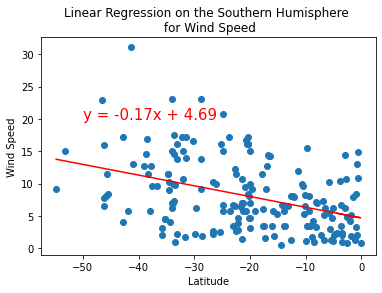

In [123]:
# build the Southern hemisphere regression line and scatter plot for lat vs. Wind Speed.
S_WindSpeed_x_Series = southern_hemi_df['Lat']
S_WindSpeed_y_Series = southern_hemi_df['Wind Speed']
# call function: plot_linear_function 
plot_linear_function(S_WindSpeed_x_Series, 
                S_WindSpeed_y_Series, 
                'Linear Regression on the Southern Humisphere \n for Wind Speed',
                'Wind Speed', (-50,20))
plt.savefig('weather_data/Regress_fig8.png')
plt.show()

In [144]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")